In [21]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [2]:
 from google.colab import drive

# # Mount Google Drive to '/content/drive'
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
zip_file_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification.zip'

# Replace 'extracted_folder' with the name you want for the extracted folder
extracted_folder_path = '/content/drive/MyDrive/Opencode'

# !unzip {zip_file_path} -d {extracted_folder_path}

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/Opencode/Medical-Image-Classification.zip' has been successfully extracted to '/content/drive/MyDrive/Opencode'.


In [4]:
zip_file_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData.zip'

# Replace 'extracted_folder' with the name you want for the extracted folder
extracted_folder_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification'

# !unzip {zip_file_path} -d {extracted_folder_path}

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData.zip' has been successfully extracted to '/content/drive/MyDrive/Opencode/Medical-Image-Classification'.


In [5]:
#Import any library here only.

import tensorflow as tf
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt
import matplotlib.image as img
import cv2

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [6]:
#Setup and check a gpu connection.


In [7]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [8]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.

In [9]:
normal_images_path = os.listdir("/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/NORMAL")
print(len(normal_images_path))
normal_images_path[35]

234


'IM-0111-0001.jpeg'

In [10]:
infected_images_path = os.listdir("/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/INFECTED")
print(len(infected_images_path))
infected_images_path[30]

390


'person113_bacteria_540.jpeg'

In [11]:
def load_data(path,list):
  label=[]
  images=[]
  for file in list:
    file_path =  os.path.join(path,file)
    img = cv2.imread(file_path)
    img = cv2.resize(img,(512,512))
    if("bacteria" in file ):
      images.append(img)
      label.append("2")
    elif("virus" in file):
      images.append(img)
      label.append("1")
    else:
      images.append(img)
      label.append("0")


  return images , label


In [12]:
normal_fol_path = "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/NORMAL"
infected_fol_path = "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/INFECTED"

In [13]:
normal_images , label_1 = load_data(normal_fol_path,normal_images_path)
print(len(label_1))

infected_images , label_2 = load_data(infected_fol_path,infected_images_path)
print(len(label_2))

234
390


In [14]:
normal_images = np.asarray(normal_images)
print(normal_images.shape)
infected_images =np.asarray(infected_images)
print(infected_images.shape)

(234, 512, 512, 3)
(390, 512, 512, 3)


In [18]:
Images = np.concatenate((normal_images, infected_images), axis=0)

print(Images.shape)

Labels = np.concatenate((label_1,label_2),axis=0)

print(Labels.shape)

(624, 512, 512, 3)
(624,)


In [22]:
''' Do not change this cell '''
check_data()

PASS


In [ ]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

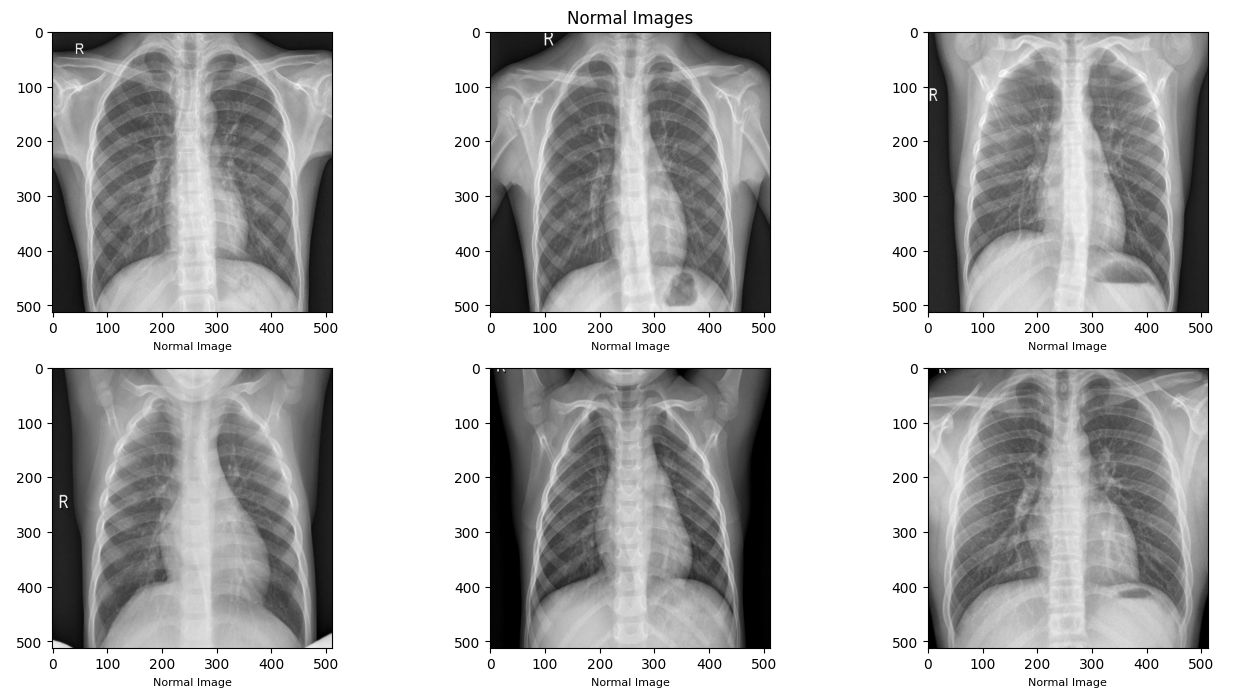

In [23]:
ct=1
fig = plt.figure(figsize =(16,8))
plt.title("Normal Images")
plt.axis("off")
plt.tick_params(left = False)
row = 2
col = 3
for i in  normal_images:
  if(1<=ct<=6):
    ct=ct+1
    fig.add_subplot(row,col,ct-1)
    plt.imshow(i)
    plt.xlabel("Normal Image",fontsize="8")


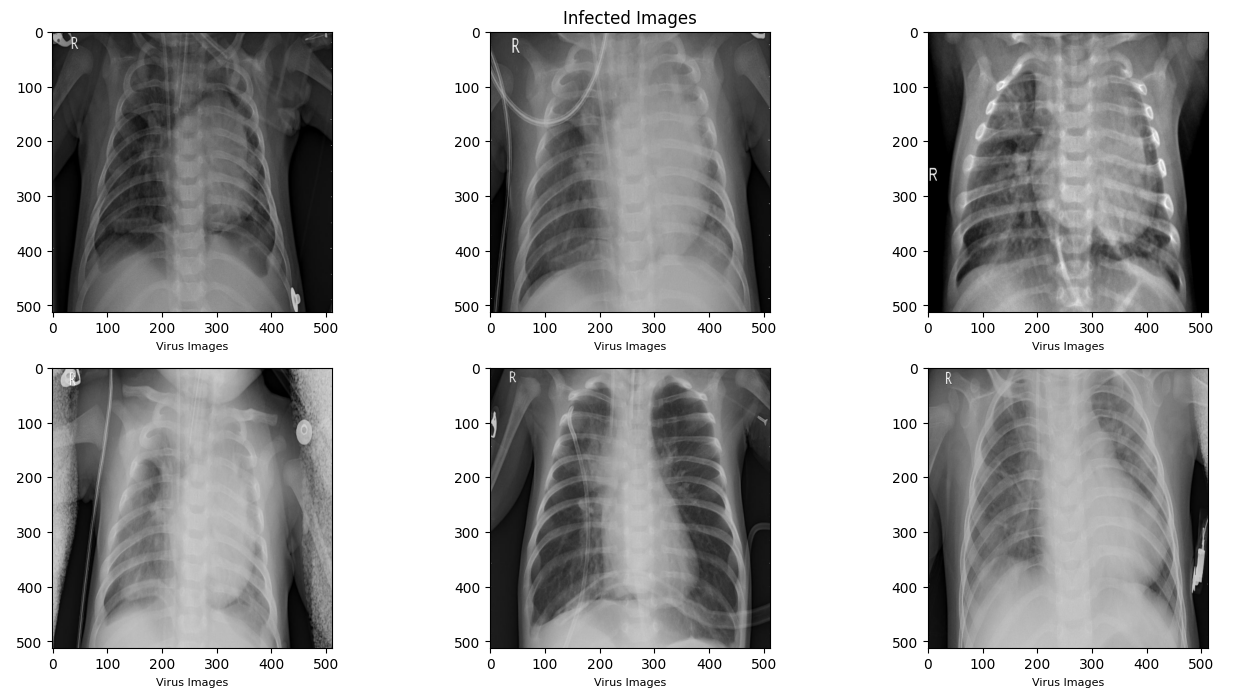

In [24]:
ct=1
fig = plt.figure(figsize =(16,8))
plt.title("Infected Images")
plt.axis("off")
plt.tick_params(left = False,right=False)
row = 2
col = 3
for i in  infected_images:
  if(1<=ct<=6):
    ct=ct+1
    fig.add_subplot(row,col,ct-1)
    plt.imshow(i)
    if(label_2[ct]==1):
      plt.xlabel("Bacterial Images",fontsize="8")
    else:
      plt.xlabel("Virus Images",fontsize="8")